MISION 1: Reclutando la tripulacion  

Para iniciar la aventura se debe elegir una tripulacion de 4 personajes: 2 espadachines, 1 navegante y 1
medico. Se dispone de 6 espadachines, 3 navegantes y 2 medicos.
1. ¿De cuantas maneras distintas se puede formar la tripulacion?
    Para obtener las distintas maneras de formar la tribulacion se puede utilizar combinatoria (forma teorica) dicha funcion esta dada por:
    $${n \choose k} = \frac{n!}{k! \, (n-k)!}$$
    Se tienen 6 espadachines y se necesitan 2, luego reemplazando n por 6 y k por 2 en la formula anterior se obtiene:
    $${6 \choose 2} = \frac{6!}{2! \, (6-2)!} =\frac{6!*5!*4!}{2*4!*}= \frac{30}{2}=15$$
    Se tienen 3 navegantes y se necesitan 1, luego reemplazando n por 3 y k por 1 en la formula anterior se obtiene:
    $${3 \choose 1} = \frac{3!}{1! \, (3-1)!} =\frac{3!*2!*1!}{2!}= \frac{3*2!}{2!}=3$$
    Se tienen 2 medicos y se necesitan 1, luego reemplazando n por 2 y k por 1 en la formula anterior se obtiene:
    $${2 \choose 1} = \frac{2!}{1! \, (2-1)!} =\frac{2!*1!*0!}{1*1!*}= \frac{2}{1}=2$$
    Finalmente multiplicando las 3 cantidades anteriores se obtiene:
    $${6 \choose 2}*{3 \choose 1}*{2 \choose 1} = 15*3*2=90$$
    Por lo tanto se tienen 90 maneras distintas de formar la tripulacion.
2. Simulen con NumPy un generador aleatorio que cree 100 tripulaciones y verifiquen si el numero de combinaciones observadas coincide con el valor teorico.
Tip: Usen combinatoria y la funcion itertools.combinations en Python.


In [169]:
import numpy as np
import itertools

In [170]:
#Personajes
espadachines=['Esp1','Esp2','Esp3','Esp4','Esp5','Esp6']
navegantes=['Nav1','Nav2','Nav3']
medicos=['Med1','Med2']

In [171]:

comb_espadachines = list(itertools.combinations(espadachines, 2))
comb_navegantes = list(itertools.combinations(navegantes, 1))
comb_medicos = list(itertools.combinations(medicos, 1))

In [172]:

todas_tripulaciones = []
for e in comb_espadachines:
    for n in comb_navegantes:
        for m in comb_medicos:
            trip = e + n + m  
            todas_tripulaciones.append(trip)


In [173]:
n=100
todas_tripulaciones = np.array(todas_tripulaciones)
indices_aleatorios = np.random.choice(len(todas_tripulaciones), n, replace=True)
tripulaciones_aleatorias = todas_tripulaciones[indices_aleatorios]
combinaciones_observadas = set(tuple(t) for t in tripulaciones_aleatorias)
print(f"Número de combinaciones observadas en {n} simulaciones: {len(combinaciones_observadas)}")


Número de combinaciones observadas en 100 simulaciones: 63


Mision 2: Recursos para la travesia  

La cantidad de provisiones disminuye segun la funcion:
$$f(x)=\frac{100}{x+1},x\geq 0$$
donde x representa los dıas de viaje.
1. Calcule el limite cuando x → ∞ y explique que significa para la tripulacion.
    $$lim_{x\to\infty}f(x)=\frac{100}{\infty+1}=0$$
    El limite tiende a cero, mientras x es mas grande, lo que indica que mientras mas pasen los dias, el alimento sera cada vez mas escaso
2. Grafiquen la funcion en Python para x = 0, 1, 2, . . . , 50.

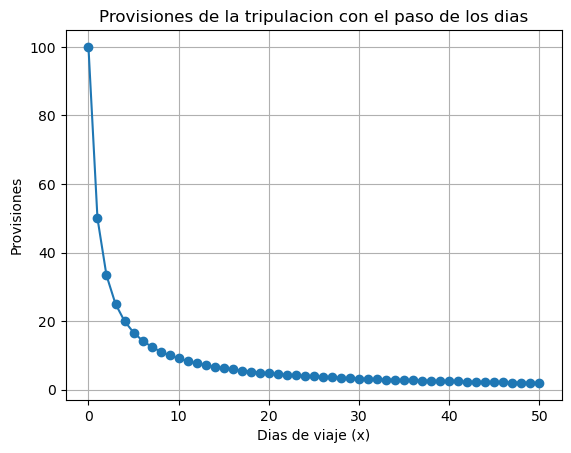

In [174]:
import matplotlib.pyplot as plt

x = np.arange(0, 51)
p = 100 / (x + 1)

plt.plot(x, p, marker='o')
plt.title("Provisiones de la tripulacion con el paso de los dias")
plt.xlabel("Dias de viaje (x)")
plt.ylabel("Provisiones")
plt.grid(True)
plt.show()